In [1]:
#
# For daal4py using please create conda environment with command like
#
# conda create -n d4p -c intel python=3.7 scikit-learn matplotlib pandas seaborn threadpoolctl
#
# and than run "jupiter notebook" with that environment from terminal
#

import numpy as np              
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import sklearn
import datetime

def is_daal4py_accessible():
    import importlib
    daal4py = importlib.util.find_spec('daal4py')
    
    # Check daal4py module in environment
    is_module_exists = daal4py is not None
    
    # Check that path to dynload libraries like 'libfabric' and 'libdaal' is set in environment (by conda)
    import os
    is_path_correct = 'libfabric' in ':'.join(os.environ.values())
    
    if is_module_exists and is_path_correct:
        return True
    return False

if is_daal4py_accessible():
    import daal4py.sklearn
    daal4py.sklearn.patch_sklearn()

Intel(R) Data Analytics Acceleration Library (Intel(R) DAAL) solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


In [2]:
np.set_printoptions(suppress=True)

# Should this Loan be Approved or Denied

TODO dataset description

## 1. Data loading

In [3]:
dataset_name = "SBAnational.csv"
data = pd.read_csv(dataset_name)

/home/masdevas/.conda/envs/d4p/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Data shape:

In [4]:
data.shape

(899164, 27)

Data columns:

In [5]:
data.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

Head of data:

In [6]:
data.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


Tail of data:

In [7]:
data.tail()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,...,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,...,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,...,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,...,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"
899163,9996003010,PACIFIC TRADEWINDS FAN & LIGHT,KAILUA,HI,96734,CENTRAL PACIFIC BANK,HI,0,27-Feb-97,1997,...,N,N,NaN,31-May-97,"$30,000.00",$0.00,P I F,$0.00,"$30,000.00","$24,000.00"


Features:

- `LoanNr_ChkDgt` - ordinal, Identifier Primary key.
- `Name` - categorical, Borrower name. Some names repeating.
- `City` - categorical, Borrower city.
- `State` - categorical, Borrower state.
- `Zip` - ordinal, Borrower zip code. Postal code, characteristic of pair "State x City\[ x District\]".
- `Bank` - categorical, Bank name.
- `BankState` - categorical, Bank state.
- `NAICS` - ordinal, North American industry classification system code. Format is a number or "0" (about 20% of values).
- `ApprovalDate` - ordinal, Date SBA commitment issued.
- `ApprovalFY` - ordinal, Fiscal year of commitment. Isn't matched with calendar year: 1 oct - 30 sep.
- `Term` - quantitative, Loan term in months.
- `NoEmp` - quantitative, Number of business employees.
- `NewExist` - categorical, 1 = Existing business, 2 = New business. "0" value in 1023 rows it isn't documented.
- `CreateJob` - quantitative, Number of jobs created.
- `RetainedJob` - quantitative, Number of jobs retained.
- `FranchiseCode` - Franchise code, (00000 or 00001) = No franchise.
- `UrbanRural` - categorical, 1 = Urban, 2 = rural, 0 = undefined.
- `RevLineCr` - categorical, Revolving line of credit: Y = Yes, N = No. Has wrong values like "0".
- `LowDoc` - categorical, LowDoc Loan Program: Y = Yes, N = No. This program is "low documented" program for credits with small gross amount.
- `ChgOffDate` - ordinal, The date when a loan is declared to be in default. # Empty value if "paid in full", otherwise date.
- `DisbursementDate` - ordinal, Disbursement date.
- `DisbursementGross` - quantitative, Amount disbursed.
- `BalanceGross` - quantitative, Gross amount outstanding. Looks like wrong values column, 99% values are "0".
- `MIS_Status` - target, categorical, Loan status "Charged off"= CHGOFF, "Paid in full"=PIF.
- `ChgOffPrinGr` - quantitative, Charged-off amount. "0" if "paid off", otherwise amount of gross amount outstanding.
- `GrAppv` - quantitative, Gross amount of loan approved by bank. Equal to DisbursementGross in about 80% cases.
- `SBA_Appv` - quantitative, SBA’s guaranteed amount of approved loan


## 2. Analyse raw features

In [8]:
data.isna().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [9]:
name = 'City'
print(data[name].value_counts())

LOS ANGELES         11558
HOUSTON             10247
NEW YORK             7846
CHICAGO              6036
MIAMI                5594
                    ...  
RANCHO MARGARITA        1
LONGMANT                1
ELMERYVILLE             1
Camilla                 1
WINSLOW TWP.            1
Name: City, Length: 32581, dtype: int64


In [10]:
name = 'State'
print(data[name].value_counts())

CA    130619
TX     70458
NY     57693
FL     41212
PA     35170
OH     32622
IL     29669
MA     25272
MN     24373
NJ     24035
WA     23263
GA     22277
WI     21040
MO     20678
CO     20605
MI     20545
UT     18776
AZ     17631
NC     14294
IN     14132
MD     13269
VA     13264
CT     12229
NH     12109
IA     11996
KS     11464
OR     11051
OK      9950
LA      9576
ID      9498
TN      9403
RI      9028
MT      8749
AL      8362
NV      8024
KY      7723
MS      7686
NE      6386
AR      6341
NM      6033
ME      5944
SC      5597
VT      5454
ND      5245
SD      4431
HI      3610
WV      3287
WY      2839
AK      2405
DE      2220
DC      1613
Name: State, dtype: int64


In [11]:
name = 'Bank'
print(data[name].value_counts())

BANK OF AMERICA NATL ASSOC        86853
WELLS FARGO BANK NATL ASSOC       63503
JPMORGAN CHASE BANK NATL ASSOC    48167
U.S. BANK NATIONAL ASSOCIATION    35143
CITIZENS BANK NATL ASSOC          35054
                                  ...  
FIRST CIT. BANCSHARES INC.            1
INSIGNIA BANK                         1
MAPLE TREE INVESTMENTS                1
THE JEFFERSON BANK                    1
PRAIRIE COMMUNITY BANK                1
Name: Bank, Length: 5802, dtype: int64


In [12]:
name = 'BankState'
print(data[name].value_counts())

CA    118116
NC     79514
IL     65908
OH     58461
SD     51095
TX     47790
RI     45366
NY     39592
VA     29002
DE     24537
MN     19960
UT     18997
PA     17081
WI     15416
MO     14861
MA     13913
GA     13812
FL     13810
AL     12134
OR     11374
WA     10693
CO     10582
CT      9917
IA      9866
NJ      9436
KS      8876
MT      7860
IN      7623
SC      7472
MI      7369
OK      7326
MD      7016
NH      6807
AR      6322
MS      5942
TN      5620
NE      5337
ND      5113
LA      5062
VT      4757
NM      4422
KY      4382
NV      4325
ID      4314
DC      4003
AZ      3957
ME      3691
HI      2991
WY      2168
WV      2007
AK      1439
PR       156
GU         5
EN         1
VI         1
AN         1
Name: BankState, dtype: int64


In [13]:
name = 'NAICS'
value_counts = data[name].value_counts()
print(value_counts)
print('Percent of "0" value is:', str(int(value_counts.loc[0] / data.shape[0] * 100))+'%')

0         201948
722110     27989
722211     19448
811111     14585
621210     14048
           ...  
315240         1
313310         1
311311         1
111130         1
212231         1
Name: NAICS, Length: 1312, dtype: int64
Percent of "0" value is: 22%


Feature 'NewExist' has "0" values, that are not documented.

In [14]:
name = 'NewExist'
print(data[name].value_counts())

1.0    644869
2.0    253125
0.0      1034
Name: NewExist, dtype: int64


Franchise code is frequently "0" or "1".

In [15]:
name = 'FranchiseCode'
print(data[name].value_counts())

1        638554
0        208835
78760      3373
68020      1921
50564      1034
          ...  
26549         1
38608         1
75677         1
77030         1
25366         1
Name: FranchiseCode, Length: 2768, dtype: int64


A lot of "Undefined" (zero-coded) values in "UrbanRural"

In [16]:
name = 'UrbanRural'
value_counts = data[name].value_counts()
print('Percent of "0" value is:', str(int(value_counts.loc[0] / data.shape[0] * 100))+'%')

Percent of "0" value is: 35%


'RevLineCr' has a lot of wrong values

In [17]:
name = 'RevLineCr'
value_counts = data[name].value_counts()
print(value_counts)

N    420288
0    257602
Y    201397
T     15284
1        23
R        14
`        11
2         6
C         2
.         1
4         1
3         1
A         1
Q         1
5         1
-         1
,         1
7         1
Name: RevLineCr, dtype: int64


'LowDoc' has a lot of wrong values

In [18]:
name = 'LowDoc'
value_counts = data[name].value_counts()
print(value_counts)

N    782822
Y    110335
0      1491
C       758
S       603
A       497
R        75
1         1
Name: LowDoc, dtype: int64


'BalanceGross' has a lot of zero values, it doesn't impact decision about creditworthiness of an borrower.

In [19]:
name = 'BalanceGross'
value_counts = data[name].value_counts()
print(value_counts)

$0.00           899150
$84,617.00           1
$43,127.00           1
$827,875.00          1
$12,750.00           1
$96,908.00           1
$1,760.00            1
$37,100.00           1
$996,262.00          1
$9,111.00            1
$115,820.00          1
$25,000.00           1
$41,509.00           1
$395,476.00          1
$600.00              1
Name: BalanceGross, dtype: int64


'MIS_Status' is a target of current research. Here is an analysis of class balance.

In [20]:
name = 'MIS_Status'
value_counts = data[name].value_counts()
print(value_counts)
print('Percent of "P I F" value is:', str(int(value_counts.loc['P I F'] / data.shape[0] * 100))+'%')
print('Percent of "CHGOFF" value is:', str(int(value_counts.loc['CHGOFF'] / data.shape[0] * 100))+'%')

P I F     739609
CHGOFF    157558
Name: MIS_Status, dtype: int64
Percent of "P I F" value is: 82%
Percent of "CHGOFF" value is: 17%


## 3. Preprocess features

In [21]:
def convert_dollars(data, column_name):
    if data[column_name].dtype != np.uint64:
        gross_data = data[column_name].astype('str')
        repl = lambda match: match.group(1)
        gross_data = gross_data.str.replace(r'\$([\d,]*)\.[\d]*', repl, regex=True)
        gross_data = gross_data.str.replace(r',', '')
        data[column_name] = gross_data.astype('float').astype(np.uint64)

data['LoanNr_ChkDgt'] = data['LoanNr_ChkDgt'].astype(np.uint64)
data['Name'] = data['Name'].astype('category')
data.drop(data.loc[data['Name'].isna()].index, inplace=True)
data['City'] = data['City'].astype('category')
data.drop(data.loc[data['City'].isna()].index, inplace=True)
data['State'] = data['State'].astype('category')
data.drop(data.loc[data['State'].isna()].index, inplace=True)
data['Zip'] = data['Zip'].astype(np.uint64)
data['Bank'] = data['Bank'].astype('category')
data.drop(data.loc[data['Bank'].isna()].index, inplace=True)
data['BankState'] = data['BankState'].astype('category')
data.drop(data.loc[data['BankState'].isna()].index, inplace=True)
data['NAICS'] = data['NAICS'].astype(np.uint64)
data['ApprovalDate'] = data['ApprovalDate'].astype('datetime64')

if data['ApprovalFY'].dtype != np.uint64:
    data['ApprovalFY'] = pd.to_numeric(data['ApprovalFY'].replace({'1976A': 1976})).astype(np.uint64)
    
data['Term'] = data['Term'].astype(np.uint64)
data['NoEmp'] = data['NoEmp'].astype(np.uint64)

if data['NewExist'].dtype != np.uint64:
    data.drop(data.loc[data['NewExist'].isna()].index, inplace=True)
    data['NewExist'] = data['NewExist'].astype(np.uint64)
    data.drop(data.loc[data['NewExist'] == 0].index, inplace=True)

data['CreateJob'] = data['CreateJob'].astype(np.uint64)
data['RetainedJob'] = data['RetainedJob'].astype(np.uint64)
data['FranchiseCode'] = data['FranchiseCode'].astype(np.uint64)
data['UrbanRural'] = data['UrbanRural'].astype('category')

# Remore values that are not in {'N', '0', 'Y', 'T'} in column 'RevLineCr'
if data['RevLineCr'].dtype != np.bool:
    data['RevLineCr'] = data['RevLineCr'].astype('str')
    data.drop(data.loc[~data['RevLineCr'].isin({'N', '0', 'Y', 'T'})].index, inplace=True)
    data['RevLineCr'] = pd.to_numeric(data['RevLineCr'].replace({'N': False, '0' : False, 'Y' : True, 'T' : True})).astype(np.bool)

# Remore values that are not in {'N', 'Y'} in column 'LowDoc'
if data['LowDoc'].dtype != np.bool:
    data['LowDoc'] = data['LowDoc'].astype('str')
    data.drop(data.loc[~data['LowDoc'].isin({'N', 'Y'})].index, inplace=True)
    data['LowDoc'] = pd.to_numeric(data['LowDoc'].replace({'N': False, 'Y' : True})).astype(np.bool)

#data['ChgOffDate'] = data['ChgOffDate'].astype('datetime64')
if "ChgOffDate" in data.columns:
    data.drop(columns=['ChgOffDate'], inplace=True)
data['DisbursementDate'] = data['DisbursementDate'].astype('datetime64')
data.drop(data.loc[data['DisbursementDate'].isna()].index, inplace=True)

# Format amounts like "$100,000.00" to numbers like "100000" in column "DisbursementGross"
convert_dollars(data, 'DisbursementGross')

if "BalanceGross" in data.columns:
    data.drop(columns=["BalanceGross"], inplace=True)

if data['MIS_Status'].dtype != np.bool:
    data['MIS_Status'] = pd.to_numeric(data['MIS_Status'].replace({'P I F': True, 'CHGOFF' : False})).astype(np.bool)

# Format amounts like "$100,000.00" to numbers like "100000" in column "ChgOffPrinGr"
convert_dollars(data, 'ChgOffPrinGr')

# Remove rows with 'MIS_Status' == 'Paid In Full' and 'ChgOffPrinGr' != 0 (inappropriate situation)
index_to_drop = data.loc[(data['ChgOffPrinGr'] != 0) & (data['MIS_Status'] == True)].index
if index_to_drop.shape[0] != 0:
    data = data.drop(index_to_drop)

# Format amounts like "$100,000.00" to numbers like "100000" in column "GrAppv"  
convert_dollars(data, 'GrAppv')
    
# Format amounts like "$100,000.00" to numbers like "100000" in column "GrAppv"
convert_dollars(data, 'SBA_Appv')
    
print("Success")

Success


## 4. Analyse preprocessed features

In [22]:
data.shape

(878792, 25)

In [23]:
data.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,...,1,0,False,True,1999-02-28,60000,True,0,60000,48000
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,...,1,0,False,True,1997-05-31,40000,True,0,40000,32000
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,...,1,0,False,False,1997-12-31,287000,True,0,287000,215250
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,...,1,0,False,True,1997-06-30,35000,True,0,35000,28000
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,...,1,0,False,False,1997-05-14,229000,True,0,229000,229000


In [24]:
data.tail()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,1997-02-27,1997,...,1,0,False,False,1997-09-30,70000,True,0,70000,56000
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,1997-02-27,1997,...,1,0,True,False,1997-10-31,85000,True,0,85000,42500
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,1997-02-27,1997,...,1,0,False,False,1997-09-30,300000,True,0,300000,225000
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,1997-02-27,1997,...,1,0,False,True,1997-03-31,75000,False,46383,75000,60000
899163,9996003010,PACIFIC TRADEWINDS FAN & LIGHT,KAILUA,HI,96734,CENTRAL PACIFIC BANK,HI,0,1997-02-27,1997,...,1,0,False,False,1997-05-31,30000,True,0,30000,24000


In [25]:
data.isna().sum()

LoanNr_ChkDgt        0
Name                 0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
dtype: int64

'NAICS' is ok.

In [26]:
name = 'NAICS'
value_counts = data[name].value_counts()
print(value_counts)
print('Percent of "0" value is:', str(int(value_counts.loc[0] / data.shape[0] * 100))+'%')

0         196805
722110     27478
722211     19172
811111     14288
621210     13768
           ...  
212210         1
314992         1
112420         1
927110         1
313310         1
Name: NAICS, Length: 1311, dtype: int64
Percent of "0" value is: 22%


Approval date is matched with Approval fiscal year in about 70% cases.

In [27]:
print(data['ApprovalDate'])
years_data = data['ApprovalDate'].apply(lambda x: x.year).astype(np.int64)
print((years_data - data['ApprovalFY']).value_counts())

0        1997-02-28
1        1997-02-28
2        1997-02-28
3        1997-02-28
4        1997-02-28
            ...    
899159   1997-02-27
899160   1997-02-27
899161   1997-02-27
899162   1997-02-27
899163   1997-02-27
Name: ApprovalDate, Length: 878792, dtype: datetime64[ns]
 0.0      675208
-1.0      203581
 99.0          2
 100.0         1
dtype: int64


'NewExist' is ok, undefined values were deleted.

In [28]:
name = 'NewExist'
print(data[name].value_counts())

1    631969
2    246823
Name: NewExist, dtype: int64


'FranchiseCode' is ok

In [29]:
name = 'FranchiseCode'
print(data[name].value_counts())

1        626391
0        201557
78760      3319
68020      1901
50564      1017
          ...  
17156         1
3708          1
25201         1
60000         1
32127         1
Name: FranchiseCode, Length: 2743, dtype: int64


Still the same situation with 'UrbanRural'

In [30]:
name = 'UrbanRural'
value_counts = data[name].value_counts()
value_counts = value_counts.rename(index={0 : '0', 1 : '1', 2 : '2'})
print(value_counts)
print('Percent of "0" (undefined) value is:', str(int(value_counts.loc['0'] / data.shape[0] * 100))+'%')

1    461497
0    313875
2    103420
Name: UrbanRural, dtype: int64
Percent of "0" (undefined) value is: 35%


'RevLineCr' is ok, no undefined values

In [31]:
name = 'RevLineCr'
value_counts = data[name].value_counts()
print(value_counts)

False    666576
True     212216
Name: RevLineCr, dtype: int64


'LowDoc' is ok, no undefined values

In [32]:
name = 'LowDoc'
value_counts = data[name].value_counts()
print(value_counts)

False    771139
True     107653
Name: LowDoc, dtype: int64


'BalanceGross' has been removed

In [33]:
name = 'BalanceGross'
print('BalanceGross in dataframe:', name in data.columns)

BalanceGross in dataframe: False


Target classes percentage is saved

In [34]:
name = 'MIS_Status'
value_counts = data[name].value_counts()
print(value_counts)
print('Percent of "P I F" value is:', str(int(value_counts.loc[True] / data.shape[0] * 100))+'%')
print('Percent of "CHGOFF" value is:', str(int(value_counts.loc[False] / data.shape[0] * 100))+'%')

True     723386
False    155406
Name: MIS_Status, dtype: int64
Percent of "P I F" value is: 82%
Percent of "CHGOFF" value is: 17%


Reset index of data for upcoming analysis

In [35]:
data = data.reset_index(drop=True)

## Analyse data

Analysis of quantitative features. Columns 'LoanNr_ChkDgt', 'Zip', 'NAICS' are conditionally quantitative, but are presented in analyses because can contain some data insights.

In [36]:
data.describe()

,LoanNr_ChkDgt,Zip,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,DisbursementGross,ChgOffPrinGr,GrAppv,SBA_Appv
count,8.787920e+05,878792.000000,878792.000000,878792.000000,878792.000000,878792.000000,878792.000000,878792.000000,878792.000000,878792.000000,8.787920e+05,8.787920e+05,8.787920e+05,8.787920e+05
mean,4.762200e+09,53811.494226,399113.839601,2001.143176,111.105313,11.424175,1.280866,8.454936,10.850350,2766.330562,2.021872e+05,1.352711e+04,1.935282e+05,1.500485e+05
std,2.539437e+09,31194.876037,263291.271906,5.876393,78.862333,73.921430,0.449423,237.171862,237.636431,12784.424979,2.880621e+05,6.548842e+04,2.835920e+05,2.283729e+05
min,1.000014e+09,0.000000,0.000000,1969.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,2.000000e+02,1.000000e+02
25%,2.574525e+09,27597.000000,235210.000000,1997.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,4.300000e+04,0.000000e+00,3.500000e+04,2.125000e+04
50%,4.351665e+09,55409.000000,445310.000000,2002.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000e+05,0.000000e+00,9.000000e+04,6.240000e+04
75%,6.863597e+09,83707.000000,561740.000000,2006.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,2.400000e+05,0.000000e+00,2.265000e+05,1.750000e+05
max,9.996003e+09,99999.000000,928120.000000,2014.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,1.144632e+07,3.512596e+06,5.000000e+06,4.500000e+06


Analysis of categorical features.

In [37]:
data.describe(include=['category'])

,Name,City,State,Bank,BankState,UrbanRural
count,878792,878792,878792,878792,878792,878792
unique,762973,32136,51,5781,55,3
top,SUBWAY,LOS ANGELES,CA,BANK OF AMERICA NATL ASSOC,CA,1
freq,1250,11342,128147,85048,114608,461497


Graphic setting up.

In [38]:
dims = (11.7, 8.27)

Terms distribution has several local highs.

/home/masdevas/.conda/envs/d4p/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/masdevas/.conda/envs/d4p/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/masdevas/.conda/envs/d4p/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


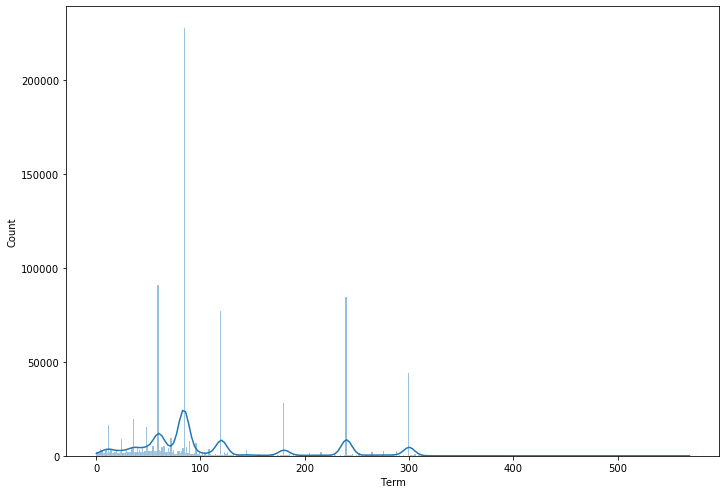

In [39]:
fig, ax = plt.subplots(figsize=dims)
sns.set_style('darkgrid')
sns.histplot(data['Term'], kde=True)

Most popular 'Term' values

In [40]:
data['Term'].value_counts()[0:5]

84     226307
60      88143
240     84474
120     76226
300     43892
Name: Term, dtype: int64

In [41]:
def get_indices(pif_parf, data, size):
    pif_index = data.loc[data['MIS_Status'] == True].index
    print("PIF index size:", pif_index.shape[0], ", PIF required size:", int(size*pif_parf))
    pif_subset = np.random.choice(pif_index, size=int(size*pif_parf), replace=False)
    
    chof_part = 1 - pif_parf
    chof_index = data.loc[data['MIS_Status'] == False].index
    print("CHOF index size:", chof_index.shape[0], ", CHOF required size:", int(size*chof_part))
    chof_subset = np.random.choice(chof_index, size=int(size*chof_part), replace=False)
    return np.concatenate([pif_subset, chof_subset])


PIF index size: 723386 , PIF required size: 70000
CHOF index size: 155406 , CHOF required size: 30000


/home/masdevas/.conda/envs/d4p/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


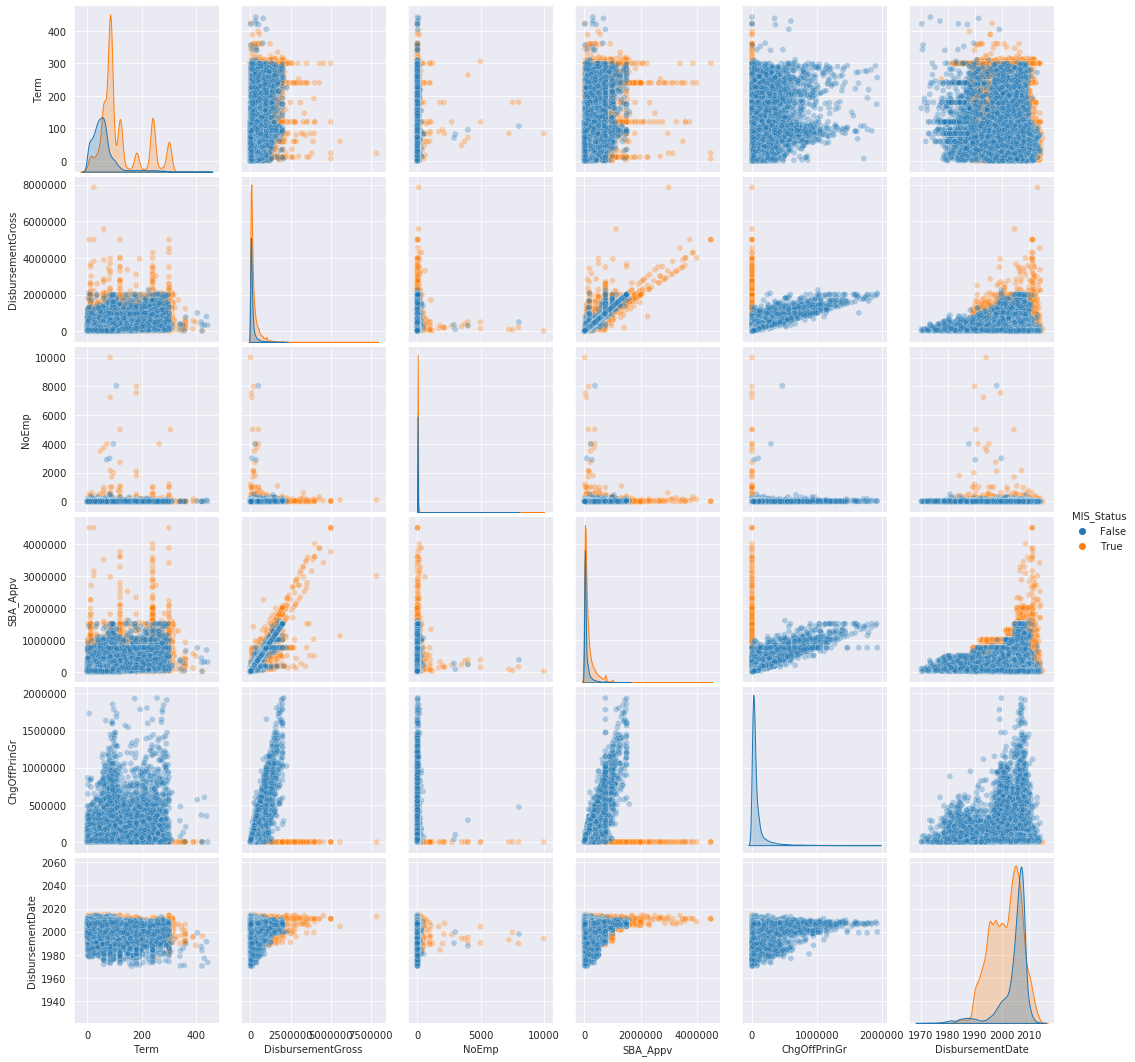

In [56]:
random_subset = get_indices(0.7, data, 100000)
sns.pairplot(data.iloc[random_subset], hue="MIS_Status", vars=['Term', 'DisbursementGross', 'NoEmp', 'SBA_Appv', 'ChgOffPrinGr', 'DisbursementDate'], plot_kws={'alpha': 0.3})

## Drop outliers

In [42]:
features = ['Term', 'DisbursementGross', 'NoEmp', 'SBA_Appv', 'ChgOffPrinGr', 'DisbursementDate']
for feature in features:
    quantile = data[feature].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])
    print(quantile,'\n')
    data = data.drop(data.loc[(data[feature] > quantile.iloc[-1]) | (data[feature] < quantile.iloc[0])].index)
data = data.reset_index(drop=True)

0.005      3.0
0.010      5.0
0.050     17.0
0.100     36.0
0.500     84.0
0.900    240.0
0.950    300.0
0.990    300.0
0.995    300.0
Name: Term, dtype: float64 

0.005       5000.0
0.010       5000.0
0.050      10200.0
0.100      20000.0
0.500     100000.0
0.900     500000.0
0.950     758000.0
0.990    1357000.0
0.995    1660000.0
Name: DisbursementGross, dtype: float64 

0.005      0.0
0.010      1.0
0.050      1.0
0.100      1.0
0.500      4.0
0.900     24.0
0.950     39.0
0.990     94.0
0.995    130.0
Name: NoEmp, dtype: float64 

0.005       2500.0
0.010       2500.0
0.050       5000.0
0.100      10000.0
0.500      60000.0
0.900     387200.0
0.950     588000.0
0.990     978750.0
0.995    1059375.0
Name: SBA_Appv, dtype: float64 

0.005         0.00
0.010         0.00
0.050         0.00
0.100         0.00
0.500         0.00
0.900     26771.20
0.950     64441.60
0.990    265309.12
0.995    401818.04
Name: ChgOffPrinGr, dtype: float64 

0.005   1984-07-03
0.010   1986-10-08
0.050   

Insights, got from pairplot:
<ul>
<li>More term - more opportunities for paiding in full (Term X DisbursementGross picture).</li>
<li>SBA approvement correlated with disbursement gross, obviously (SBA_Appv x DisbursementGross picture).</li>
<li>Companies with large number of employees always paid their borrows (NoEmp X DisbursementGross picture). </li>
</ul>

PIF index size: 700382 , PIF required size: 70000
CHOF index size: 143507 , CHOF required size: 30000


/home/masdevas/.conda/envs/d4p/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


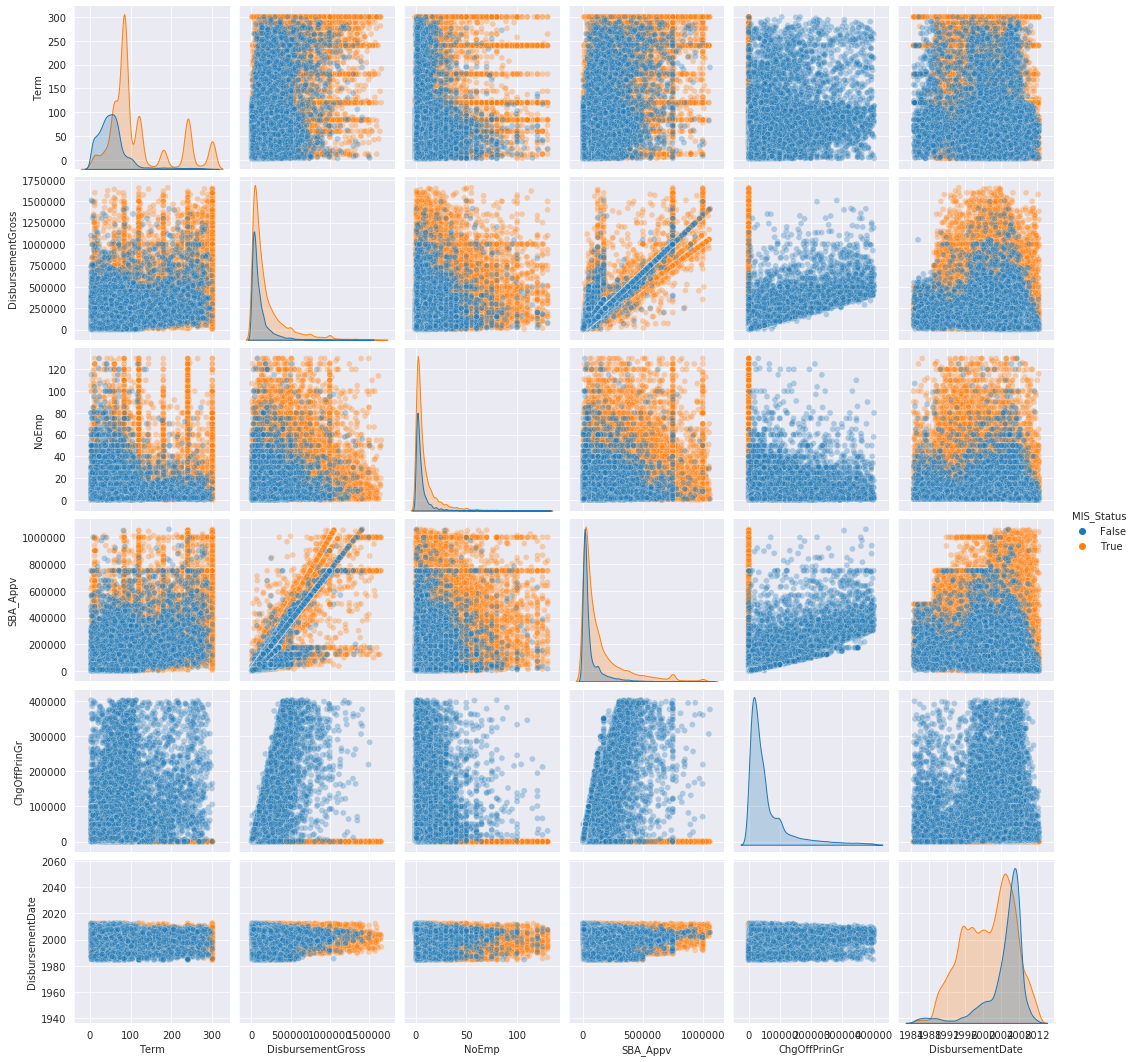

In [58]:
random_subset = get_indices(0.7, data, 100000)
sns.pairplot(data.iloc[random_subset], hue="MIS_Status", vars=['Term', 'DisbursementGross', 'NoEmp', 'SBA_Appv', 'ChgOffPrinGr', 'DisbursementDate'], plot_kws={'alpha': 0.3})

Apply logarithm to amount values

PIF index size: 700382 , PIF required size: 70000
CHOF index size: 143507 , CHOF required size: 30000


/home/masdevas/.conda/envs/d4p/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/masdevas/.conda/envs/d4p/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/masdevas/.conda/envs/d4p/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/masdevas/.conda/envs/d4p/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


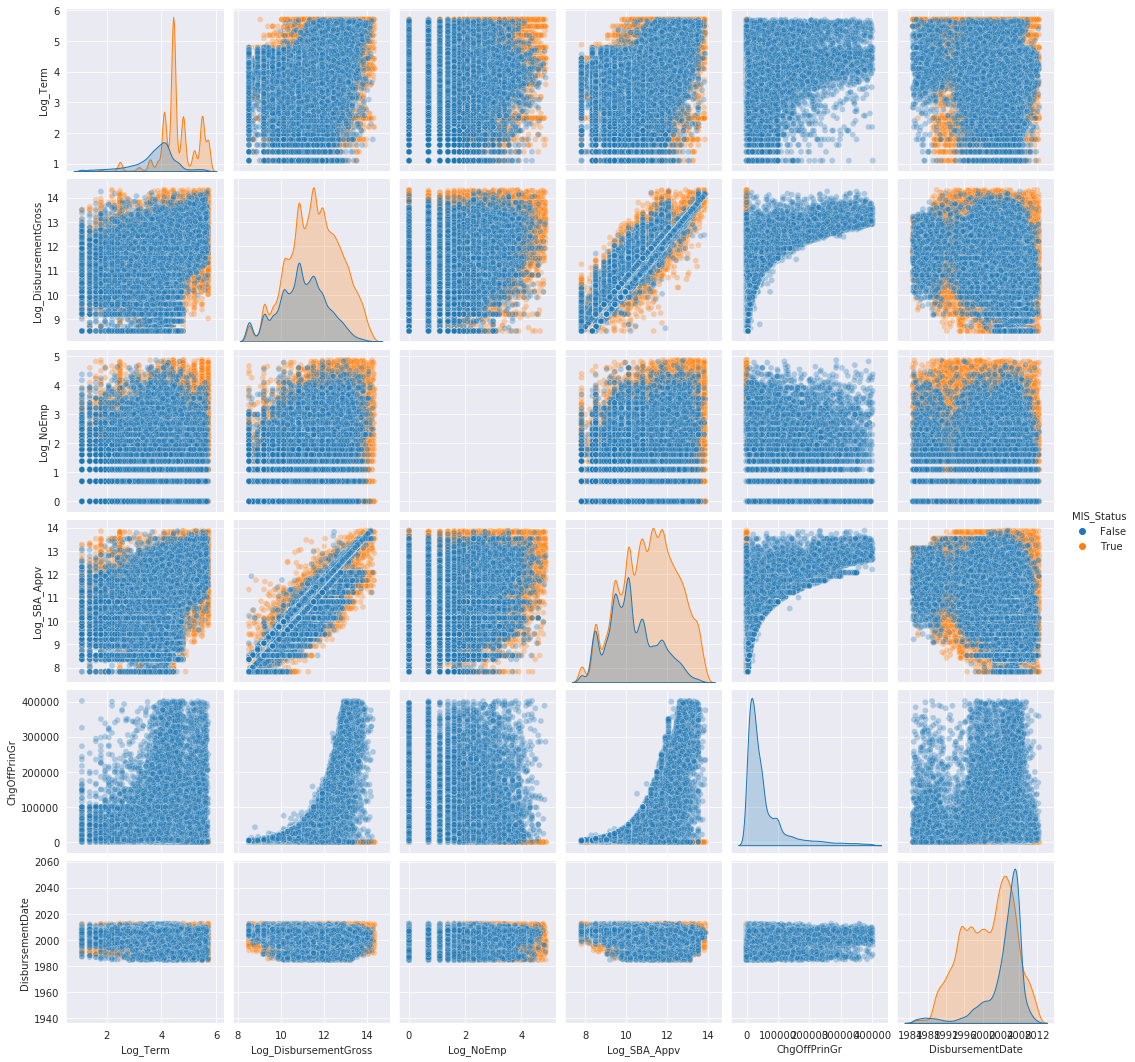

In [59]:
random_subset = get_indices(0.7, data, 100000)
data_log = data.copy()
data_log['Log_Term'] = np.log(data_log['Term'])
data_log['Log_DisbursementGross'] = np.log(data_log['DisbursementGross'])
data_log['Log_SBA_Appv'] = np.log(data_log['SBA_Appv'])
data_log['Log_NoEmp'] = np.log(data_log['NoEmp'])
data_log.drop(['DisbursementGross', 'SBA_Appv', 'NoEmp', 'Term'], axis=1)
sns.pairplot(data_log.iloc[random_subset], hue="MIS_Status" ,vars=['Log_Term', 'Log_DisbursementGross', 'Log_NoEmp', 'Log_SBA_Appv', 'ChgOffPrinGr', 'DisbursementDate'], plot_kws={'alpha': 0.3})

Correlation matrix calculation:

In [43]:
corr_mat = data.corr()
corr_mat

,LoanNr_ChkDgt,Zip,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,RevLineCr,LowDoc,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
LoanNr_ChkDgt,1.000000,0.026265,-0.064627,-0.221325,0.103411,0.048070,-0.037394,-0.022212,-0.023714,0.047319,-0.164044,0.203282,0.068531,0.172891,-0.081309,0.083558,0.095023
Zip,0.026265,1.000000,-0.033365,-0.046526,0.141504,0.042413,-0.039501,0.003266,0.003087,0.011081,-0.062951,-0.020829,0.095554,0.001937,0.006456,0.102591,0.111197
NAICS,-0.064627,-0.033365,1.000000,0.491085,-0.115416,-0.141147,0.045318,-0.039974,-0.037242,0.023856,0.170960,-0.109235,-0.083561,-0.120789,0.056354,-0.094586,-0.107018
ApprovalFY,-0.221325,-0.046526,0.491085,1.000000,-0.308206,-0.189677,0.035908,-0.070894,-0.064642,-0.019815,0.399152,-0.176631,-0.133300,-0.247983,0.097602,-0.173816,-0.204700
Term,0.103411,0.141504,-0.115416,-0.308206,1.000000,0.172521,-0.073873,0.028292,0.025462,0.021565,-0.346645,-0.107230,0.516362,0.324463,-0.127242,0.550268,0.582807
NoEmp,0.048070,0.042413,-0.141147,-0.189677,0.172521,1.000000,-0.164869,0.030234,0.043833,0.022108,-0.126509,-0.094350,0.357097,0.108611,-0.011979,0.361192,0.374679
NewExist,-0.037394,-0.039501,0.045318,0.035908,-0.073873,-0.164869,1.000000,-0.002196,-0.008537,0.126655,-0.089498,0.164992,-0.079070,-0.017718,0.029711,-0.068754,-0.065458
CreateJob,-0.022212,0.003266,-0.039974,-0.070894,0.028292,0.030234,-0.002196,1.000000,0.995053,0.000675,-0.016488,-0.013326,0.007573,-0.012554,0.016055,0.008968,0.015569
RetainedJob,-0.023714,0.003087,-0.037242,-0.064642,0.025462,0.043833,-0.008537,0.995053,1.000000,-0.000809,-0.011744,-0.016696,0.008950,-0.013239,0.016435,0.009483,0.014771
FranchiseCode,0.047319,0.011081,0.023856,-0.019815,0.021565,0.022108,0.126655,0.000675,-0.000809,1.000000,-0.090854,0.031029,0.053292,0.015782,0.034304,0.062101,0.063804


Correlation matrix visualization.
Insights:
<ul>
<li> Approved fiscal year correlate with revolving line credit. It means that companies request revolving line credits more often than several years ago.</li>
<li> Long term loans are approved with more amount than short term credits.</li>
<li> More term - more opportunities for paiding in full.</li>
<li> Companies with large number of employees always paid their loans. </li>
<li> Today companies prefer short term loans than several years ago. </li>
<li> Revolving line credits often are short term and with small amount. </li>
</ul>

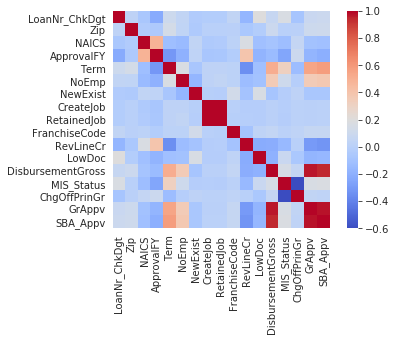

In [44]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')

In [45]:
corr_mat.where(np.triu(corr_mat > 0.3, k=1)).stack().sort_values(ascending=False)

CreateJob          RetainedJob          0.995053
GrAppv             SBA_Appv             0.977344
DisbursementGross  GrAppv               0.973826
                   SBA_Appv             0.944610
Term               SBA_Appv             0.582807
                   GrAppv               0.550268
                   DisbursementGross    0.516362
NAICS              ApprovalFY           0.491085
ApprovalFY         RevLineCr            0.399152
NoEmp              SBA_Appv             0.374679
                   GrAppv               0.361192
                   DisbursementGross    0.357097
Term               MIS_Status           0.324463
dtype: float64

In [46]:
corr_mat.where(np.triu(corr_mat < -0.3, k=1)).stack().sort_values(ascending=False)

ApprovalFY  Term           -0.308206
RevLineCr   SBA_Appv       -0.325027
Term        RevLineCr      -0.346645
MIS_Status  ChgOffPrinGr   -0.600855
dtype: float64

## 5. Preprocess data for ML algorithm

In [47]:
ml_dataset = data.copy()

Drop cheat column

In [48]:
ml_dataset.drop(columns=['ChgOffPrinGr'], inplace=True)

Encode categorical features

In [49]:
from sklearn.preprocessing import LabelEncoder

category_columns = data.select_dtypes(include='category').columns
for column in category_columns:
    le = LabelEncoder()
    le.fit(ml_dataset[column])
    encoded_columns = le.transform(ml_dataset[column])
    ml_dataset[column] = encoded_columns

Drop columns for ML

In [50]:
ml_dataset.drop(columns=['DisbursementDate', 'ApprovalDate'], inplace=True)

Encode dates for ML

In [51]:
for column in ml_dataset.columns:
    print(ml_dataset[column])

0         1000014003
1         1000024006
2         1000034009
3         1000044001
4         1000054004
             ...    
843884    9995573004
843885    9995603000
843886    9995613003
843887    9995973006
843888    9996003010
Name: LoanNr_ChkDgt, Length: 843889, dtype: uint64
0          12015
1         382431
2         716755
3          79149
4          36459
           ...  
843884    234216
843885    234216
843886    538423
843887    419119
843888    491533
Name: Name, Length: 843889, dtype: int64
0          8289
1         18932
2          2131
3          2633
4         20434
          ...  
843884    28549
843885     4987
843886    24506
843887    12009
843888    13338
Name: City, Length: 843889, dtype: int64
0         15
1         15
2         15
3         36
4          9
          ..
843884    35
843885    35
843886     4
843887    11
843888    11
Name: State, Length: 843889, dtype: int64
0         47711
1         46526
2         47401
3         74012
4         32801
        

Split data on train and test data

In [52]:
from sklearn.model_selection import train_test_split

ml_data = ml_dataset.loc[:, ml_dataset.columns != 'MIS_Status']
ml_labels = ml_dataset.loc[:, ml_dataset.columns == 'MIS_Status']
X_train, X_test, y_train, y_test = train_test_split(ml_data, ml_labels, test_size=0.33, random_state=42)

In [53]:
X_train

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalFY,Term,...,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,GrAppv,SBA_Appv
687572,7605003004,590437,4338,42,37421,4770,11,0,1994,84,...,2,0,0,1,0,False,True,50000,50000,45000
432396,4448263003,306003,16810,43,75150,2505,46,812320,1991,84,...,2,0,0,1,0,False,False,100000,100000,90000
555944,5860503010,195546,11523,16,67601,1741,18,541810,1993,84,...,1,0,0,1,0,False,False,28600,28600,25740
98995,1776975002,294946,20846,17,42003,455,29,812199,2006,49,...,2,0,4,0,2,False,False,10000,10000,5000
71917,1574815002,10234,15164,4,90043,455,29,621410,2006,31,...,1,0,4,0,1,False,False,159488,90000,45000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,2909674009,397306,907,43,78701,4120,46,722110,1999,35,...,2,0,0,1,0,False,False,300000,300000,225000
365838,3748475007,231587,8539,20,21042,3324,36,541519,2010,60,...,1,0,22,0,1,True,False,300000,300000,150000
131932,2025384010,300164,15164,4,90023,454,5,0,1998,88,...,1,0,0,1,0,False,False,150000,150000,112500
671155,7428084000,652922,17169,4,95351,951,48,238130,2004,7,...,1,12,17,1,1,False,False,50000,50000,25000


In [54]:
y_train

,MIS_Status
687572,True
432396,True
555944,True
98995,False
71917,False
...,...
259178,False
365838,True
131932,False
671155,False


In [55]:
X_test

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalFY,Term,...,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,GrAppv,SBA_Appv
556695,5869454000,637276,16991,34,11764,455,29,445110,2003,84,...,1,0,4,1,1,False,False,81300,81300,40650
522420,5468474005,107907,15209,17,40207,4040,9,811113,2002,59,...,1,0,2,1,1,True,False,10000,10000,5000
528135,5537593004,611584,4232,18,70043,4202,20,624410,1993,228,...,2,0,0,1,0,False,False,110000,110000,99000
88335,1701155009,168660,13887,30,3431,4806,9,448120,2006,36,...,1,0,5,0,2,True,False,10000,10000,5000
726627,8216074000,624397,24213,37,97302,951,48,541810,2005,90,...,1,1,4,1,1,True,False,116289,50000,25000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155286,2187556008,720052,30479,9,32789,694,10,541990,2006,82,...,1,3,9,1,1,False,False,115000,115000,86250
203062,2517736007,504537,20212,36,73114,1407,38,213112,2007,60,...,2,0,0,1,1,False,False,515000,515000,386250
258039,2902564008,214357,21394,3,85013,5219,4,621610,1999,244,...,2,0,0,1,0,False,False,647483,835000,626250
283819,3079286007,61217,11511,13,83835,3761,51,623990,2008,240,...,1,2,0,1,2,False,False,544000,554000,554000


In [56]:
y_test

,MIS_Status
556695,True
522420,True
528135,True
88335,True
726627,True
...,...
155286,False
203062,True
258039,True
283819,True


## 6. KNN

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline_knn = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier())])
pipeline_knn.fit(X_train, y_train)

/home/masdevas/.conda/envs/d4p/lib/python3.7/site-packages/daal4py/sklearn/neighbors/knn.py:259: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return super(KNeighborsClassifier, self).fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

Accuracy (isn't the best for imbalanced classes task)

In [68]:
pipeline_knn.score(X_test, y_test)

0.8854871375016159

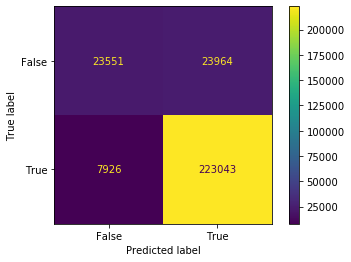

In [69]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(pipeline_knn, X_test, y_test)

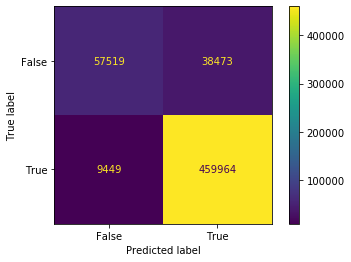

In [70]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(pipeline_knn, X_train, y_train)

## 7. Logistic Regression

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def generate_class_weights():
    result = []
    for part in np.linspace(0.5, 1-1e-3, 5):
        result.append({0:part, 1:1-part})
    return result

#class_weights = generate_class_weights()

parameters_lr = {'logreg__penalty':['l2'], 'logreg__C':np.linspace(0.5, 1, 5), 'logreg__class_weight':{0: 0.65, 1: 0.35}, 'logreg__max_iter':[100000]}

pipeline_lr = Pipeline([("scaler", StandardScaler()), ("logreg", LogisticRegression())])
clf_lr = GridSearchCV(pipeline_lr, parameters_lr, scoring='f1_macro', cv=4)
clf_lr.fit(X_train, y_train.to_numpy().reshape(-1))

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'logreg__C': array([0.5  , 0.625, 0.75 , 0.875, 1.   ]),
                         'logreg__class_weight': [{0: 0.5, 1: 0.5},
                                                  {0: 0.62475, 1: 0.37525},
                                                  {0: 0.7495,
                                                   1: 0.25049999999999994},
                                                  {0: 0.87425,
                                                   1: 0.12575000000000003},
                                                  {0: 0.999,
                                                   1: 0.0010000000000000009}],
                         'logreg__max_iter': [100000],
                         'logreg__penalty': ['l2']},
             scoring='f1_macro')

In [60]:
clf_lr.score(X_test, y_test)

0.7502582117643197

In [59]:
clf_lr.best_params_

{'logreg__C': 1.0,
 'logreg__class_weight': {0: 0.62475, 1: 0.37525},
 'logreg__max_iter': 100000,
 'logreg__penalty': 'l2'}

In [61]:
def remake_params(params, prefix_len):
    result_params = {}
    for key, value in params.items():
        result_params[key[prefix_len:]] = value
    return result_params

In [62]:
lr_best_params = remake_params(clf_lr.best_params_, 8)
print(lr_best_params)

{'C': 1.0, 'class_weight': {0: 0.62475, 1: 0.37525}, 'max_iter': 100000, 'penalty': 'l2'}


Create the best classifier

In [63]:
pipeline_the_best_lr = Pipeline([("scaler", StandardScaler()), ("logreg", LogisticRegression(**lr_best_params))])
pipeline_the_best_lr.fit(X_train, y_train.to_numpy().reshape(-1))

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(class_weight={0: 0.62475, 1: 0.37525},
                                    max_iter=100000))])

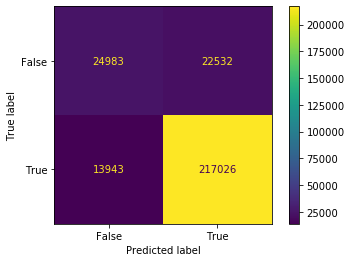

In [64]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(pipeline_the_best_lr, X_test, y_test)

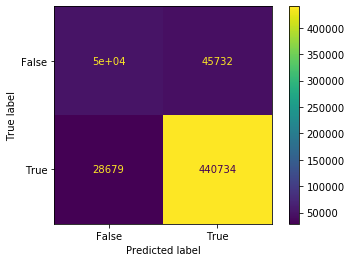

In [65]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(pipeline_the_best_lr, X_train, y_train)

In [66]:
pipeline_the_best_lr['logreg'].coef_

array([[ 0.33079636,  0.01222123,  0.02250687,  0.12860494, -0.12995939,
         0.13574471,  0.05341044, -0.11423653, -0.4412167 ,  2.32429497,
         0.30318803, -0.01931275, -0.10823985, -0.02560995, -0.05643273,
        -0.02646436,  0.16250428,  0.172036  ,  0.058681  ,  0.55584476,
        -0.84373657]])

## 8. XGBoost

In [57]:
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from statistics import mean
from sklearn.preprocessing import StandardScaler

xgb_X_train = X_train
xgb_y_train = y_train

rng = np.random.RandomState(31337)
kf = KFold(n_splits=3, shuffle=True, random_state=rng)
gs_results = []
for n_estimators in [30, 50]:
    for max_depth in [1, 2]:
        for min_child_weight in [1.7, 1.85]:
            for gamma in [0.1, 0.2]:
                d = { 'max_depth':max_depth, 'min_child_weight':min_child_weight, 'gamma':gamma, 'n_estimators':n_estimators }
                for train_index, test_index in kf.split(xgb_X_train):
                    scaler = StandardScaler()
                    scaler.fit(xgb_X_train.iloc[train_index])
                    xgb_X_train_local = scaler.transform(xgb_X_train.iloc[train_index])
                    xgb_model = xgb.XGBClassifier(n_jobs=6, **d).fit(xgb_X_train_local, xgb_y_train.iloc[train_index])
                    
                    scaler = StandardScaler()
                    scaler.fit(xgb_X_train.iloc[test_index])
                    xgb_X_test_local = scaler.transform(xgb_X_train.iloc[test_index])
                    predictions = xgb_model.predict_proba(xgb_X_test_local)[:,1]
                    
                    actuals = xgb_y_train.iloc[test_index]
                    mean_score = f1_score(actuals.round(), predictions.round(), average='macro')
                d['mean_score'] = mean_score 
                gs_results.append(d)

/home/masdevas/.conda/envs/d4p/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/masdevas/.conda/envs/d4p/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/masdevas/.conda/envs/d4p/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/masdevas/.conda/envs/d4p/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/home/masdevas/.conda/envs/d4p/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/masdevas/.conda/envs/d4p/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/masdevas/.conda/envs/d4p/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/masdevas/.conda/envs/d4p/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

In [58]:
def get_top_parameters_xgboost(parameters_list, top=5):
    return sorted(parameters_list, key=lambda parameter: parameter['mean_score'])[::-1][0:top]

In [59]:
top_xgb_parameters = get_top_parameters_xgboost(gs_results)
print(top_xgb_parameters)

[{'max_depth': 2, 'min_child_weight': 1.85, 'gamma': 0.1, 'n_estimators': 50, 'mean_score': 0.8759539638215607}, {'max_depth': 2, 'min_child_weight': 1.85, 'gamma': 0.2, 'n_estimators': 50, 'mean_score': 0.8750275672553001}, {'max_depth': 2, 'min_child_weight': 1.7, 'gamma': 0.1, 'n_estimators': 50, 'mean_score': 0.8747598740293666}, {'max_depth': 2, 'min_child_weight': 1.7, 'gamma': 0.2, 'n_estimators': 50, 'mean_score': 0.8708859406372631}, {'max_depth': 2, 'min_child_weight': 1.85, 'gamma': 0.1, 'n_estimators': 30, 'mean_score': 0.858696877349875}]


In [62]:
top_xgb_parameter = top_xgb_parameters[0].copy()
del top_xgb_parameter['mean_score']

scaler = StandardScaler()
scaler.fit(X_train)
xgb_X_train = scaler.transform(X_train)

scaler = StandardScaler()
scaler.fit(X_test)
xgb_X_test = scaler.transform(X_test)

xgb_model = xgb.XGBClassifier(n_jobs=6, **top_xgb_parameter).fit(xgb_X_train, y_train)
xgb_prediction = xgb_model.predict(xgb_X_test)
score = f1_score(y_test, xgb_prediction.round(), average='macro')
print(score)

/home/masdevas/.conda/envs/d4p/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8701789742949131


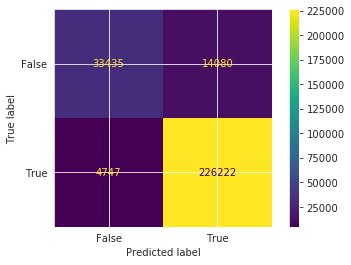

In [63]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(xgb_model, xgb_X_test, y_test)

## 6. Нормализация количественных признаков

Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать.

Наиболее часто используют один из двух следующих способов:
- *приведение к отрезку $[0,1]$* - это линейное преобразование, приводящее все значения к заданному отрезку;
- *стандартизация* - линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению.

Выполним стандартизацию всех признаков:

In [79]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)

In [80]:
data_stand.describe()

,Price,Date,Lat,Lng,Type,Floors,Rooms,Floor,Area,Block,Brick,Monolithic,Panel,Wooden
count,7.126500e+04,7.126500e+04,7.126500e+04,7.126500e+04,7.126500e+04,7.126500e+04,7.126500e+04,7.126500e+04,7.126500e+04,7.126500e+04,7.126500e+04,7.126500e+04,7.126500e+04,7.126500e+04
mean,-3.457784e-14,3.415814e-14,1.189763e-10,1.461346e-11,-7.783650e-15,1.042658e-15,-2.840891e-17,1.679265e-15,4.902486e-14,2.609938e-15,7.636375e-15,-4.229541e-15,-1.124466e-14,-1.911193e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.436041e+00,-2.369930e+00,-3.194676e+01,-2.603922e+01,-3.583966e-01,-1.638407e+00,-2.138317e+00,-1.080450e+00,-1.612224e+00,-1.659937e-01,-1.668114e+00,-2.590597e-01,-4.538025e-01,-6.246610e-02
25%,-6.353513e-01,-8.454286e-01,-6.709721e-01,-8.170459e-01,-3.583966e-01,-8.588008e-01,-1.039485e+00,-8.224775e-01,-7.243784e-01,-1.659937e-01,-1.668114e+00,-2.590597e-01,-4.538025e-01,-6.246610e-02
50%,-2.636026e-01,3.491437e-01,1.124355e-01,-4.362416e-02,-3.583966e-01,-7.919410e-02,5.934758e-02,-3.065331e-01,-3.038198e-01,-1.659937e-01,5.994710e-01,-2.590597e-01,-4.538025e-01,-6.246610e-02
75%,3.083184e-01,9.066107e-01,6.738943e-01,8.637058e-01,-3.583966e-01,5.055109e-01,1.158180e+00,4.673834e-01,4.905686e-01,-1.659937e-01,5.994710e-01,-2.590597e-01,-4.538025e-01,-6.246610e-02
max,6.628046e+00,1.225163e+00,1.857363e+01,6.728663e+00,2.790166e+00,3.039233e+00,4.454676e+00,5.110882e+00,5.116713e+00,6.024241e+00,5.994710e-01,3.860059e+00,2.203571e+00,1.600846e+01


## 7. Отбор признаков 

Для предсказания цены квартиры будем использовать все входные признаки, кроме `Date`.

In [81]:
data_stand.columns

Index(['Price', 'Date', 'Lat', 'Lng', 'Type', 'Floors', 'Rooms', 'Floor',
       'Area', 'Block', 'Brick', 'Monolithic', 'Panel', 'Wooden'],
      dtype='object')

In [82]:
X = data_stand.drop(['Price', 'Date'], axis=1)
y = data['Price']

Можно конвертировать таблицы в массивы:

In [83]:
#X = np.array(data_stand.drop(['Price', 'Date'], axis=1))
#y = np.array(data['Price'])

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(53448, 17817)

## 8. Линейная регрессия 

- Создаем модель и задаем гиперпараметры (конструктор)
- Тренируем модель (метод `fit`)
- Используем модель на новых данных (метод `predict`) и измеряем качество модели

In [85]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
y_train_predict = lr_model.predict(X_train)
y_test_predict  = lr_model.predict(X_test)

In [87]:
lr_model.coef_

array([ 6.02006117e+01,  2.19592321e+02, -3.95453470e+01,  1.05169881e+02,
       -3.41135703e+02,  3.12635159e+01,  1.67635576e+03, -1.05285283e+15,
       -2.87416196e+15, -1.58223307e+15, -2.45257460e+15, -4.05540211e+14])

### Измеряем метрики качества

*Остаточная сумма квадратов*:
$$
{\rm RSS} = \sum_{i=1}^N \left(y^{(i)} - \widehat{y}^{(i)} \right)^2
$$
где 
$$
\widehat{y}^{(i)} = \beta_0 + \sum_{j=1}^d \beta_j x_j^{(i)}
$$

*Полная сумма квадратов*:
$$
{\rm TSS} = \sum_{i=1}^N \left(y^{(i)} - \overline{y} \right)^2,
$$
где 
$$
\overline{y} = \frac{1}{N} \sum_{i=1}^N y^{(i)}
$$

$$
\overline{y} = \beta_0 + \sum_{j=1}^d \beta_j \overline{x}_j
$$


*Сумма квадратов, обусловленная регрессией*:
$$
{\rm ESS} = \sum_{i=1}^N \left(\overline{y} - \widehat{y}^{(i)} \right)^2
$$

Можно показать, что
$$
{\rm TSS} = {\rm RSS} + {\rm ESS}
$$

*Коэффициент детерминации*, или *коэффициент регрессии Пирсона*:
$$
R^2 = 1 - \frac{{\rm RSS}}{{\rm TSS}} = \frac{{\rm ESS}}{{\rm TSS}}
$$
— доля объясняемого регрессией разброса относительно среднего (чем ближе к 1, тем модель лучше объясняет данные).

$$
0 \le R^2 \le 1
$$

$R = \sqrt{R^2}$ равно (по модулю) выборочной корреляции между $y^{(i)}$ и $\widehat{y}^{(i)}$

Если $d = 1$, то $R$ равен (по модулю) выборочной корреляции между $y^{(i)}$ и $x^{(i)}$.

*Средняя сумма квадратов отклонений* (MSE - Mean Squared Error)
$$
{\rm MSE} = \frac{1}{N} {\rm RSS} = \frac{1}{N} \sum_{i=1}^N \left(y^{(i)} - \widehat{y}^{(i)} \right)^2
$$

*Среднеквадратическая ошибка* (RMSE - Rooted Mean Squared Error)
$$
{\rm RMSE} = \sqrt{{\rm MSE}}
$$

MSE иногда называют *средней квадратической ошибкой*, что, конечно же, правильней отражает суть дела, но добавляет путаницы.

Для вычисления этих метрик можно воспользоваться соответствующими функциями из модуля `metrics` библиотеки `sklearn`, но можно также вычислить "вручную". Значение $R^2$ также вычисляет метод `score` объекта `LinearRegression`

In [88]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

(680391.8336842395, 646837.8801769295, 0.7785898643883027, 0.7850726934253254)

In [89]:
lr_model.score(X_train, y_train) # Коэффициент детерминации R^2

0.7785898643883027

In [90]:
lr_model.score(X_test, y_test)

0.7850726934253254

In [91]:
MSE_train = np.mean((y_train_predict - y_train)**2)
MSE_test  = np.mean((y_test_predict - y_test)**2)
MSE_train, MSE_test

(680391.8336842455, 646837.8801769273)

In [92]:
np.sqrt(MSE_train), np.sqrt(MSE_test)

(824.8586749766565, 804.2623205005488)

### Как цена зависит от площади квартиры?

Попробуем построить линейную модель, описывающую зависимость `Price` только от `Area`

In [93]:
lr_model = LinearRegression()
lr_model.fit(X_train[['Area']], y_train)

y_train_predict = lr_model.predict(X_train[['Area']])
y_test_predict  = lr_model.predict(X_test[['Area']])

In [94]:
MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)

In [95]:
np.sqrt(MSE_train), np.sqrt(MSE_test)

(917.3718123137436, 899.3036150457865)

### Как цена зависит от количества комнат?

Попробуем построить линейную модель, описывающую зависимость `Price` только от `Rooms`

In [96]:
lr_model = LinearRegression()
lr_model.fit(X_train[['Rooms']], y_train)

y_train_predict = lr_model.predict(X_train[['Rooms']])
y_test_predict  = lr_model.predict(X_test[['Rooms']])

In [97]:
MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)

In [98]:
np.sqrt(MSE_train), np.sqrt(MSE_test)

(1458.981115973685, 1443.8483136229686)

Ошибка заметно возрасла

### Как цена зависит от площади и количества комнат?

Попробуем построить линейную модель, описывающую зависимость `Price` от `Area` и `Rooms`

In [99]:
lr_model = LinearRegression()
lr_model.fit(X_train[['Area', 'Rooms']], y_train)

y_train_predict = lr_model.predict(X_train[['Area', 'Rooms']])
y_test_predict  = lr_model.predict(X_test[['Area', 'Rooms']])

In [100]:
MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)

In [101]:
np.sqrt(MSE_train), np.sqrt(MSE_test)

(866.9660247204029, 848.6218659646153)

## 9. Случайный лес (Random Forest)

In [102]:
from sklearn import ensemble
rf_model = ensemble.RandomForestRegressor(n_estimators = 100)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [103]:
MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)

In [104]:
np.sqrt(MSE_train), np.sqrt(MSE_test)

(866.9660247204029, 848.6218659646153)

Полученные ошибки больше, чем ошибки линейной регрессии (при использовании всех признаков)

Метод Random Forest позволяет получить некоторые оценки "*важности*" признаков.
Чем значение больше, тем признак важнее.

In [105]:
importances = rf_model.feature_importances_
importances

array([6.22139845e-02, 7.34654792e-02, 2.99875976e-03, 5.59412566e-02,
       1.12561695e-02, 1.67005144e-02, 7.72393908e-01, 3.33813648e-04,
       1.30097657e-03, 1.85886292e-03, 1.41056163e-03, 1.25713024e-04])

In [106]:
np.sum(importances)

1.0

In [107]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
importances

Area          0.772394
Lng           0.073465
Lat           0.062214
Floors        0.055941
Floor         0.016701
Rooms         0.011256
Type          0.002999
Monolithic    0.001859
Panel         0.001411
Brick         0.001301
Block         0.000334
Wooden        0.000126
dtype: float64

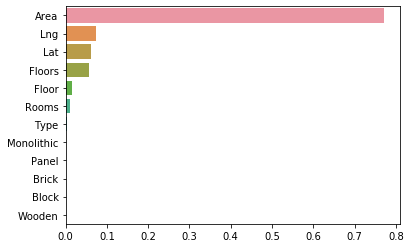

In [108]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass